# Segmentation 개요

- Segmentation(세분화)란 이미지에서 관심객체를 픽셀단위로 추출하는 것을 말한다. 관심객체가 이미지 어디에 있는 위치 뿐아니라 그 객체의 모양을 추출하고자 할때 방식이다.
- 딥러닝의 발전과 함께 많은 성능향상이 이뤄진 분야 이다.

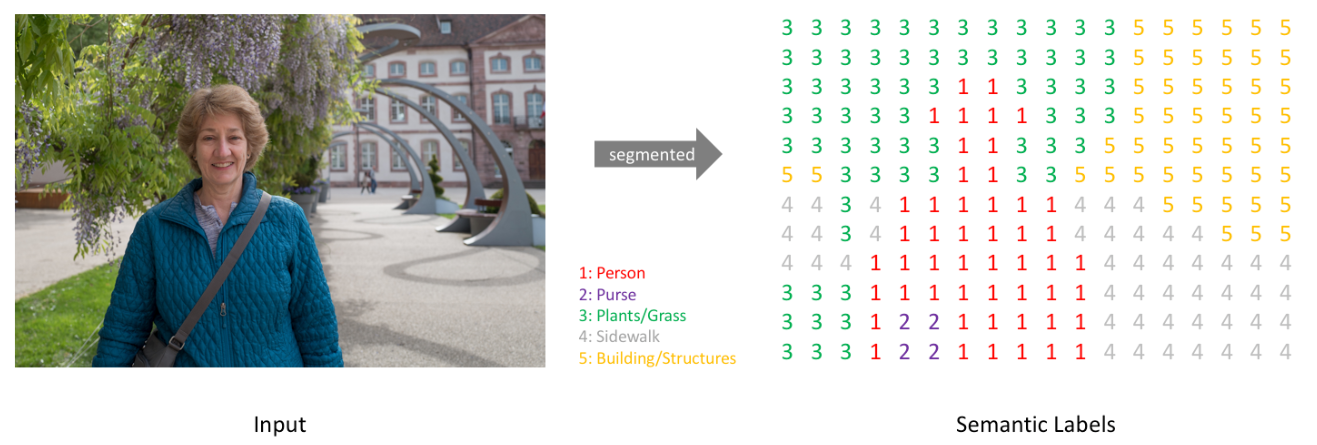

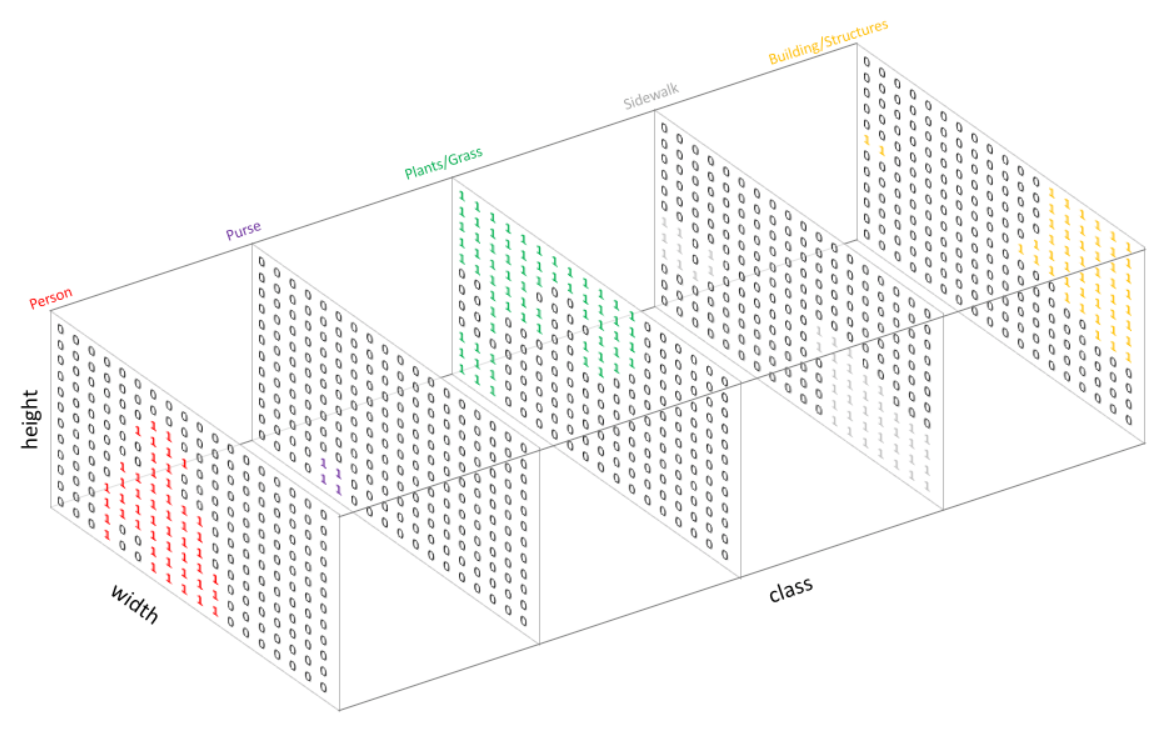

<출처>https://www.jeremyjordan.me/semantic-segmentation/

## 응용분야

- <b style='font-size:1.3em'>자율주행 자동차</b>

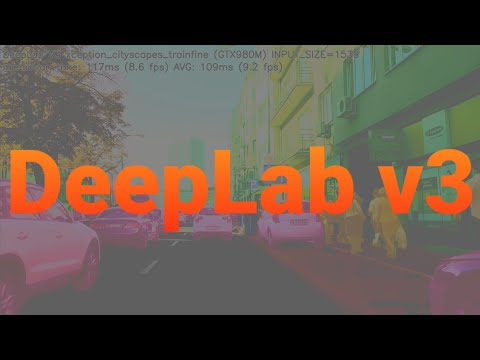

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('ATlcEDSPWXY')

- <b style='font-size:1.3em'>영상의학 분야</b>

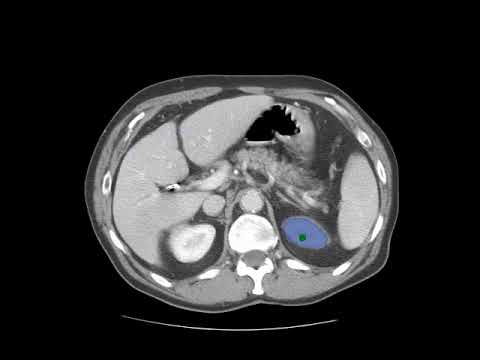

In [2]:
YouTubeVideo('nY8odT9plXk')

<b style='font-size:1.3em'>위성 영상 분석</b>

https://deepsense.ai/wp-content/uploads/2019/07/Satellite-images-semantic-segmentation-with-deep-learning.mp4

# Segmentation 종류

## Semantic segmentation
- 관심객체를 Category(범주) 별로 분류하는 segmentation이다. 이미지내의 모든 픽셀(요소)에 대해서 class를 분류하는 것을 목표로 한다.  (배경포함)
- 같은 class의 객체가 여러개 있을 경우에 **각각을 구분하지 않는다.**

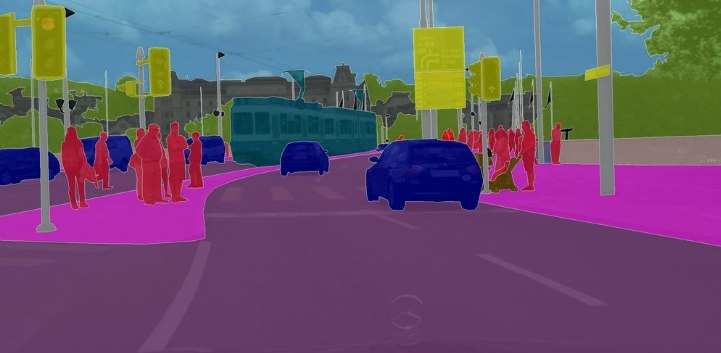
<center style='font-size:0.8em'>
[출처] https://medium.com/intro-to-artificial-intelligence/semantic-segmentation-udaitys-self-driving-car-engineer-nanodegree-c01eb6eaf9d
</center>

## Instance segmentation
- 이미지에서 관심객체를 객체별로 분류하는 segmentation이다.
- Semantic segmentation과 다르게 동일한 클래스라고 해도 다른 객체일 경우 구분해서 검출하고 배경의 경우는 분류하지 않는다.

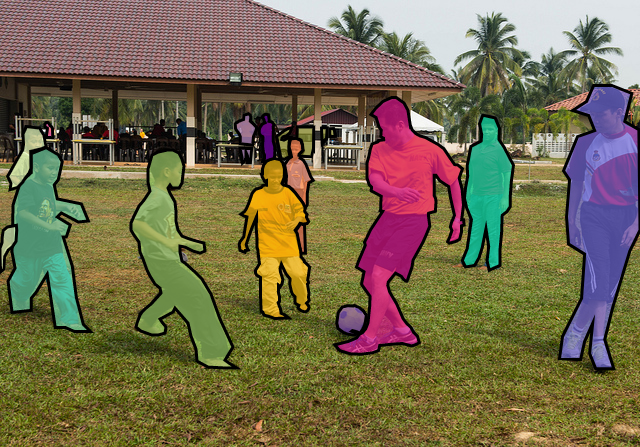

## Panoptic segmentation
- Semantic segmentation과 instance segmentation을 합친 방식이다.
- 이미지내의 모든 픽셀에 대해 클래스별 예측을 하고 각각의 instance 별로 구분하여 추론한다.

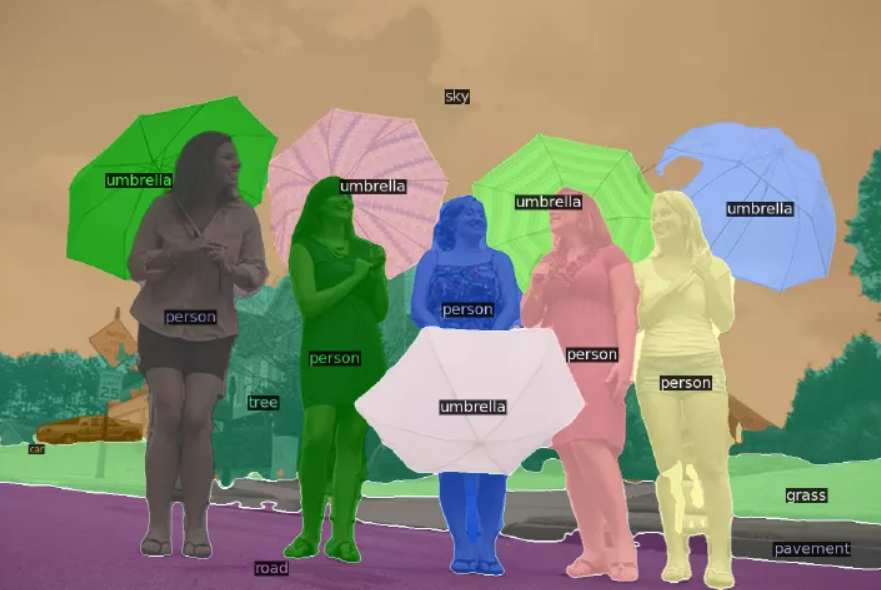

# 주요 모델

## Fully Convolution Networks for Semantic Segmentation

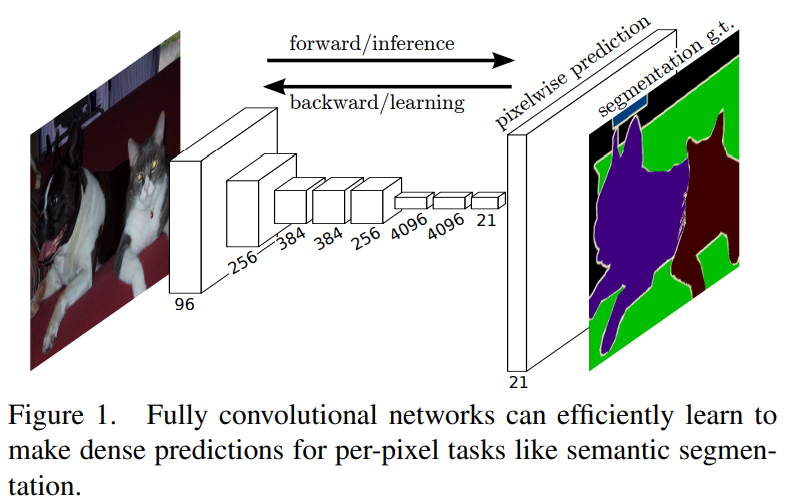

- 2015년 CVPR 학회에서 발표된 모델
- 당시 이미지 분류에 좋은 성능을 보이던 CNN 모델을 segmentation 업무에 적용시키려함.
- https://arxiv.org/abs/1411.4038

### 모델 핵심 구조
<b style='font-size:1.2em'>1. 전체 네트워크 구조를 Convolution Layer로 구성</b>
- 기존 이미지 분류 모델들은 입력층에서 중간부분까지 Convolution Layer들을 이용해 특징들을 추출하고 그 특징을 출력층인 Fully Connected Layer 에 전달하여 결과를 출력하였다.
- 이런 구조는 semantic segmentation에서는 다음과 같은 이유로 한계점이 있다.
    1. 3차원의 Feature map이 1차원으로 변환되면서 이미지의 위치정보가 사라진다.
    2. Fully connected Layer의 weight 개수를 모델 구성시 정해야 하기 때문에 고정된 크기의 input을 사용해야 한다. 
- 이런 한계점을 보완하기 위해 fc-layer들을 제거하고 전체 네트워크를 convolution layer로 구성함. 그 결과 object가 있을만한 영역을 나타내주는 heatmap이 생성되는 것을 확인할 수 있었다.
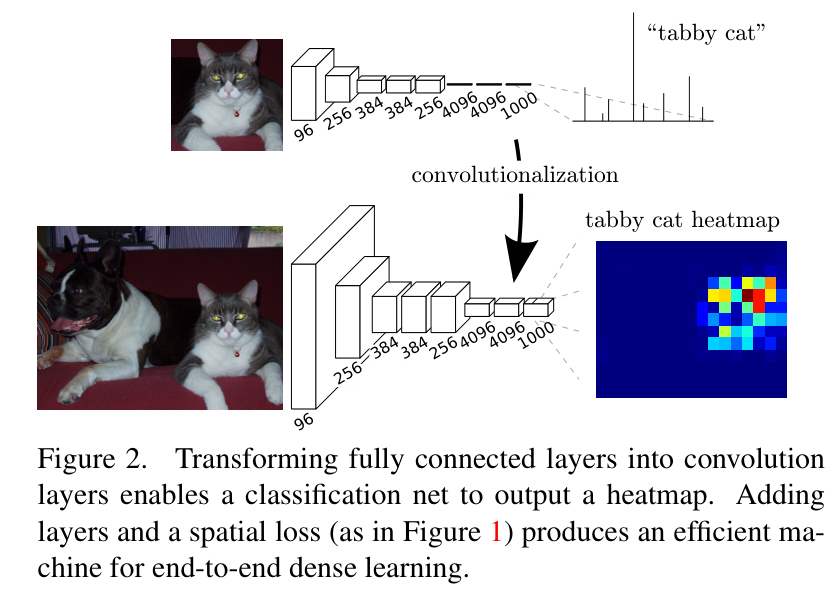

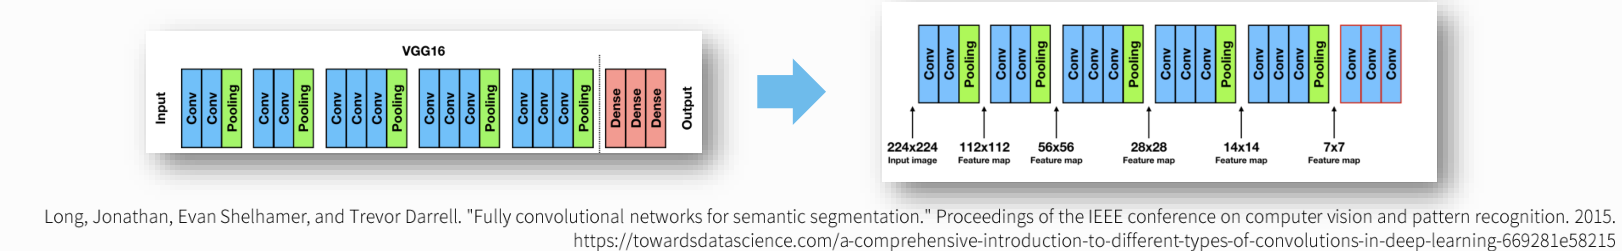

VGG16의 마지막 FC-layer를 3개의 1 x 1 필터의 convolution layer로 대체. 

<b style='font-size:1.2em'>2. Upsampling</b>
- Segmentation을 위해 size가 작아진 Feature map을 다시 Input image의 size로 키움.
- Upsampling  방식으로 Bilinear Interpolation 방식과 Transpose Convolution 방식을 사용함.
    
> - <b style='font-size:1.2em'>[Bilinear Interpolation](https://darkpgmr.tistory.com/117)</b>   
>     - 1차원 구조의 보간법인 Linear interpotation을 2차원으로 확장한 방식    
>     - size를 키우면새 생긴 공간을 계산식을 이용해 채워넣는다. 

> - <b style='font-size:1.2em'>Transpose Convolution</b>
>     - convolution 연산으로 size가 작아진 feature map을 원래 크기로 돌리는 convolution 연산. **값을 복원하는 것이 아니라 size를 복원한다.**
>     - filter size - 1크기의 zero padding을 붙인다. 설정한 **stride 만큼 feature map의 원소들을 떨어 트리고, 지정한 padding 만큼 zero padding을 제거한다.**
>     - https://github.com/aqeelanwar/conv_layers_animation#transposed-convolution

<b style='font-size:1.2em'>3. Skip connection</b>    

- Downsampling 으로 size가 줄어든 상태에서 bilinear interpolation 방식으로 upsamping하여 디테일이 사라진 부정확한 결과를 출력하게된다.
- 그래서 이전 Layer의 디테일이 남아있는 Feature map을 합쳐서(skip) upsampling을 수행한다.
- FCN-32s: skip connection을 사용하지 않은 모델로 마지막 출력결과를 32배 upsampling해서 FCN-32s라고 한다.
- FCN-16s: 4번째 conv block 의 Feature map을 skip connection 하여 16배 upsampling을 수행한다.
- FCN-8s: 3번째 conv block의 Feature map을 skip connection 하여 8배 upsampling을 수행한다.

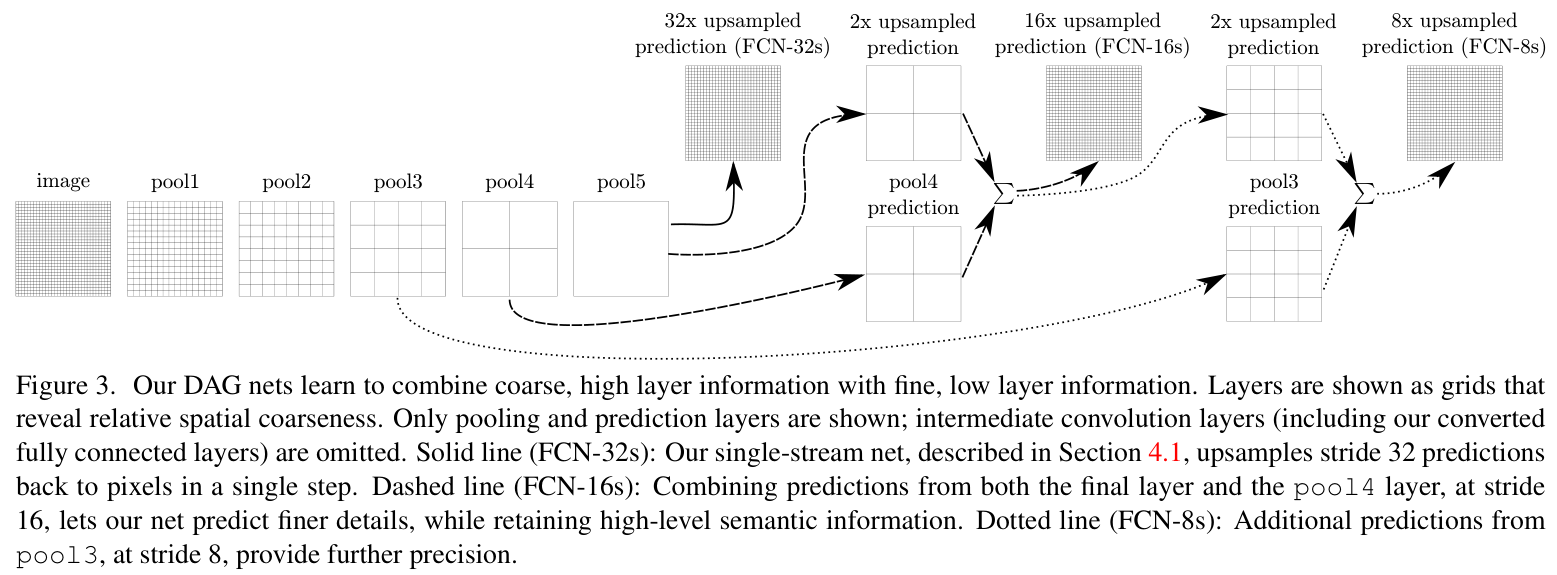

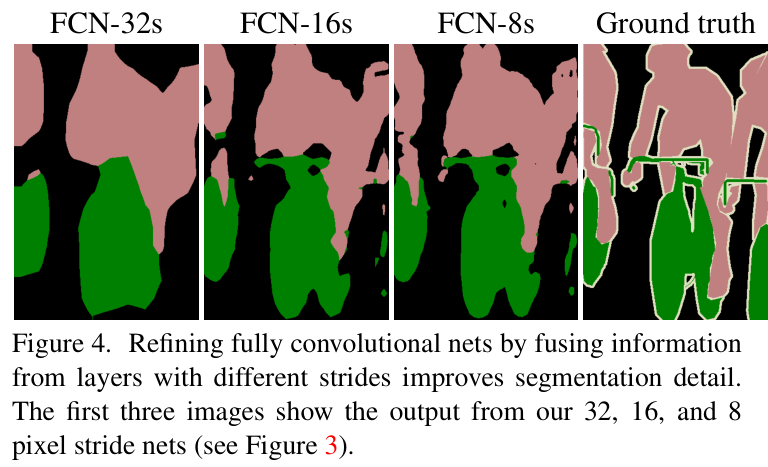

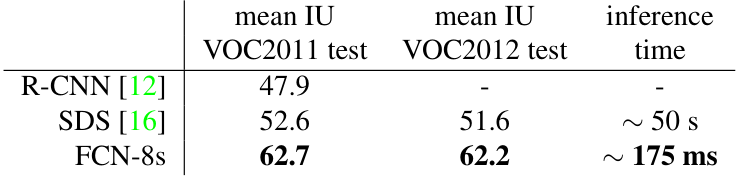

> **meanIU** : IU==IoU. meanIU는 class별로 IoU의 평균값

## U-Net
- 2015년도에 발표한 의료영상 segmentation을 위한 FCN(Fully Convolution Network)기반에 CNN 모델.
- Downsampling과 Upsampling이 연결된 U 자 모양이어서 U-Net이란 이름이 붙여짐.
- https://arxiv.org/abs/1505.04597
![u-net architecture](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*qNdglJ1ORP3Gq77MmBLhHQ.png)

### 모델구조
- U-Net 모델은 다음 세가지 구조로 나눠진다.
    1. Contracting Path (수축경로)
        - 점진적으로 넓은 범위의 이미지를 참고하여 Context 정보(특징 정보)를 추출한다.
    2. Expanding Path (확장 경로)
        - Context 정보를 픽셀의 위치정보와 결합해 각 픽셀이 어떤 객체에 속하는지 구분한다.
    3. Bottlenet 
        - Contracting path에서 Expanding path로 전환되는 구간.
- Convolution 연산과정에서 패딩을 사용하지 않기 때문에 모델의 output size가 input size보다 작다. 
    - input: 572 X 572 X 3
    - output: 388 X 388 X (class개수)